In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [105]:
#Create a reference the CSV file desired
csv_path = "GlobalLandTemperaturesByCountry.csv"

# Read the CSV into a Pandas DataFrame
climateChange_df = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
climateChange_df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [106]:
# add column year from dt
climateChange_df['Year']=climateChange_df['dt'].str[:4]
climateChange_df.head()


# only save data from 2000. original data source has data from year 1750 
RecentClimateChange_df = climateChange_df.loc[climateChange_df["Year"] > "1999",:]


In [107]:
#dataframe only for USA
RecentClimateChangeUSA_df = RecentClimateChange_df.loc[RecentClimateChange_df["Country"] == "United States",:]
RecentClimateChangeUSA_df.head(300)

# get yearly average temp from monthly average temps
groupedUSA_df = RecentClimateChangeUSA_df.groupby(["Country","Year"], as_index=False)
groupedUSA_df.head()

ClimateChangeCountryYearlyUSA_df = groupedUSA_df["AverageTemperature"].mean()
ClimateChangeCountryYearlyUSA_df.head(300)

ClimateChangeCountryYearlyUSA_df = ClimateChangeCountryYearlyUSA_df.replace('\n','', regex=True)
ClimateChangeCountryYearlyUSA_df.head(300)

,Country,Year,AverageTemperature
0,United States,2000,9.649750
1,United States,2001,9.785583
2,United States,2002,9.816167
3,United States,2003,9.755083
4,United States,2004,9.667500
5,United States,2005,9.892667
6,United States,2006,9.974500
7,United States,2007,9.837500
8,United States,2008,8.951417
9,United States,2009,9.137083


In [108]:
#dataframe only for India
RecentClimateChangeIndia_df = RecentClimateChange_df.loc[RecentClimateChange_df["Country"] == "India",:]
RecentClimateChangeIndia_df.head(300)

# get yearly average temp from monthly average temps
groupedIndia_df = RecentClimateChangeIndia_df.groupby(["Country","Year"], as_index=False)
groupedIndia_df.head()

ClimateChangeCountryYearlyIndia_df = groupedIndia_df["AverageTemperature"].mean()
ClimateChangeCountryYearlyIndia_df.head(300)

ClimateChangeCountryYearlyIndia_df = ClimateChangeCountryYearlyIndia_df.replace('\n','', regex=True)
ClimateChangeCountryYearlyIndia_df.head(300)

,Country,Year,AverageTemperature
0,India,2000,24.498000
1,India,2001,24.581917
2,India,2002,24.913000
3,India,2003,24.649917
4,India,2004,24.634583
5,India,2005,24.495417
6,India,2006,24.732083
7,India,2007,24.649917
8,India,2008,24.406000
9,India,2009,25.146667


In [109]:
# get yearly average temp from monthly average temps for all countries
grouped_df = RecentClimateChange_df.groupby(["Country","Year"], as_index=False)
grouped_df.head()

ClimateChangeCountryYearly_df = grouped_df["AverageTemperature"].mean()
ClimateChangeCountryYearly_df.head()
ClimateChangeCountryYearly_df["Year"]= ClimateChangeCountryYearly_df["Year"].astype(int)
ClimateChangeCountryYearly_df["Country"]= ClimateChangeCountryYearly_df["Country"].astype(str)

ClimateChangeCountryYearly_df['Country'] = ClimateChangeCountryYearly_df['Country'].str.strip()
ClimateChangeCountryYearly_df.dtypes

Country                object
Year                    int64
AverageTemperature    float64
dtype: object

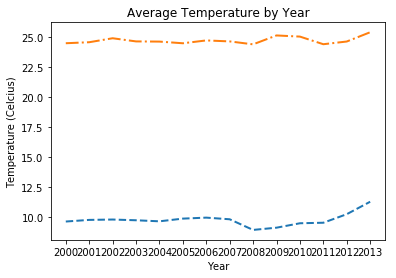

In [110]:

#plt.scatter(ClimateChangeCountryYearlyUSA_df['Year'], ClimateChangeCountryYearlyUSA_df['AverageTemperature'])
plt.xlabel("Year")
plt.ylabel("Temperature (Celcius)")
plt.title("Average Temperature by Year")
#plt.show()

#ClimateChangeCountryYearlyUSA_df.plot(kind='line',x=ClimateChangeCountryYearlyUSA_df['Year'], y=ClimateChangeCountryYearlyUSA_df['AverageTemperature'], title='USA Temp by Year')

plt.plot(ClimateChangeCountryYearlyUSA_df['Year'], ClimateChangeCountryYearlyUSA_df['AverageTemperature'], '--', linewidth=2)
plt.plot(ClimateChangeCountryYearlyIndia_df['Year'], ClimateChangeCountryYearlyIndia_df['AverageTemperature'], '-.', linewidth=2)
plt.show()

#how to add legend to show which color represents which country?

In [111]:
#Create a reference the CSV file desired
csv_path = "Historical Populations by Country.csv"

# Read the CSV into a Pandas DataFrame
population_df = pd.read_csv(csv_path, encoding = "ISO-8859-1")

# Print the first five rows of data to the screen
population_df.head()

,Country,1985,1990,1995,2000,2005,2010,2015
0,Afghanistan,13120000,13569000,19446000,22462000,26335000,29121000,32565000
1,Albania,2957000,3245000,3159000,3159000,3025000,2987000,3030000
2,Algeria,22009000,25191000,28322000,30639000,32918000,35950000,39543000
3,American Samoa,39000,48000,54000,58000,57000,56000,55000
4,Andorra,45000,53000,64000,66000,77000,85000,86000


In [112]:
population_df= population_df.drop(population_df.columns[[1,2,3]], axis=1)
population_df.head()



,Country,2000,2005,2010,2015
0,Afghanistan,22462000,26335000,29121000,32565000
1,Albania,3159000,3025000,2987000,3030000
2,Algeria,30639000,32918000,35950000,39543000
3,American Samoa,58000,57000,56000,55000
4,Andorra,66000,77000,85000,86000


In [113]:
chunk_2000_2005= (pd.to_numeric(population_df["2005"])-pd.to_numeric(population_df["2000"]))/5

pop_2001= population_df["2000"]+chunk_2000_2005
pop_2002= population_df["2000"]+(chunk_2000_2005)*2
pop_2003= population_df["2000"]+(chunk_2000_2005)*3
pop_2004= population_df["2000"]+(chunk_2000_2005)*4

population_df["2001"]= pop_2001.astype(int)
population_df["2002"]= pop_2002.astype(int)
population_df["2003"]= pop_2003.astype(int)
population_df["2004"]= pop_2004.astype(int)

chunk_2005_2010= (pd.to_numeric(population_df["2010"])-pd.to_numeric(population_df["2005"]))/5

pop_2006= population_df["2005"]+chunk_2005_2010
pop_2007= population_df["2005"]+(chunk_2005_2010)*2
pop_2008= population_df["2005"]+(chunk_2005_2010)*3
pop_2009= population_df["2005"]+(chunk_2005_2010)*4

population_df["2006"]= pop_2006.astype(int)
population_df["2007"]= pop_2007.astype(int)
population_df["2008"]= pop_2008.astype(int)
population_df["2009"]= pop_2009.astype(int)


#Add 
chunk_2010_2015= (pd.to_numeric(population_df["2015"])-pd.to_numeric(population_df["2010"]))/5

pop_2011= population_df["2010"]+chunk_2010_2015
pop_2012= population_df["2010"]+(chunk_2010_2015)*2
pop_2013= population_df["2010"]+(chunk_2010_2015)*3

population_df["2011"]= pop_2011.astype(int)
population_df["2012"]= pop_2012.astype(int)
population_df["2013"]= pop_2013.astype(int)

population_df.head()



,Country,2000,2005,2010,2015,2001,2002,2003,2004,2006,2007,2008,2009,2011,2012,2013
0,Afghanistan,22462000,26335000,29121000,32565000,23236600,24011200,24785800,25560400,26892200,27449400,28006600,28563800,29809800,30498600,31187400
1,Albania,3159000,3025000,2987000,3030000,3132200,3105400,3078600,3051800,3017400,3009800,3002200,2994600,2995600,3004200,3012800
2,Algeria,30639000,32918000,35950000,39543000,31094800,31550600,32006400,32462200,33524400,34130800,34737200,35343600,36668600,37387200,38105800
3,American Samoa,58000,57000,56000,55000,57800,57600,57400,57200,56800,56600,56400,56200,55800,55600,55400
4,Andorra,66000,77000,85000,86000,68200,70400,72600,74800,78600,80200,81800,83400,85200,85400,85600


In [114]:
grouped_population= population_df.groupby("Country",as_index=False)
grouped_population.head(5)

,Country,2000,2005,2010,2015,2001,2002,2003,2004,2006,2007,2008,2009,2011,2012,2013
0,Afghanistan,22462000,26335000,29121000,32565000,23236600,24011200,24785800,25560400,26892200,27449400,28006600,28563800,29809800,30498600,31187400
1,Albania,3159000,3025000,2987000,3030000,3132200,3105400,3078600,3051800,3017400,3009800,3002200,2994600,2995600,3004200,3012800
2,Algeria,30639000,32918000,35950000,39543000,31094800,31550600,32006400,32462200,33524400,34130800,34737200,35343600,36668600,37387200,38105800
3,American Samoa,58000,57000,56000,55000,57800,57600,57400,57200,56800,56600,56400,56200,55800,55600,55400
4,Andorra,66000,77000,85000,86000,68200,70400,72600,74800,78600,80200,81800,83400,85200,85400,85600
5,Angola,12683000,14770000,17043000,19626000,13100400,13517800,13935200,14352600,15224600,15679200,16133800,16588400,17559600,18076200,18592800
6,Anguilla,12000,14000,15000,17000,12400,12800,13200,13600,14200,14400,14600,14800,15400,15800,16200
7,Antigua and Barbuda,76000,82000,87000,93000,77200,78400,79600,80800,83000,84000,85000,86000,88200,89400,90600
8,Argentina,37336000,39182000,41344000,43432000,37705200,38074400,38443600,38812800,39614400,40046800,40479200,40911600,41761600,42179200,42596800
9,Armenia,3101000,3085000,3072000,3057000,3097800,3094600,3091400,3088200,3082400,3079800,3077200,3074600,3069000,3066000,3063000


In [115]:
melt_population= pd.melt(population_df, id_vars='Country', value_vars=["2000","2005","2010","2015","2001","2002","2003","2004","2006","2007","2008","2009","2011","2012","2013"])
melt_population["variable"]= melt_population["variable"].astype(int)
melt_population["value"]= melt_population["value"].astype(int)
melt_population["Country"]= melt_population["Country"].astype(str)
melt_population.head()
melt_population["Country"] = melt_population["Country"].str.strip()
melt_population.dtypes

Country     object
variable     int64
value        int64
dtype: object

In [117]:
final_population_df = melt_population.rename(columns={"variable":"Year", "value":"Population"})
final_population_df.head()
#final_population_df.columns

,Country,Year,Population
0,Afghanistan,2000,22462000
1,Albania,2000,3159000
2,Algeria,2000,30639000
3,American Samoa,2000,58000
4,Andorra,2000,66000


In [118]:
file = "clean_malaria_file.csv"

malaria_file = pd.read_csv(file, encoding = 'latin-1')
malaria_file.head()


,Countries,Indicators,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Algeria,Population at risk of malaria,1110165,1125250,1140055,1155105,1171135,1188635,1207745,1228395,1250375,1273405,1297205,1321704,1346860,1368727,1390950,1413533
1,Angola,Population at risk of malaria,13925000,14385000,14887000,15421000,15977000,16544000,17122000,17713000,18314000,18927000,19549000,20180490,20820525,21530282,22264234,23023206
2,Benin,Population at risk of malaria,6949000,7175000,7415000,7666000,7923000,8182000,8444000,8707000,8973000,9241000,9510000,9779795,10050702,10364601,10688303,11022114
3,Botswana,Population at risk of malaria,728325,739945,750735,760695,769825,778540,786840,794725,802610,810080,817135,824481,831623,840865,850211,859660
4,Burkina Faso,Population at risk of malaria,11608000,11946000,12296000,12659000,13034000,13422000,13822000,14235000,14660000,15095000,15540000,15995313,16460141,16946235,17446685,17961913


In [120]:
malaria_cases = malaria_file.dropna(how='any')
malaria_cases.head()

,Countries,Indicators,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Algeria,Population at risk of malaria,1110165,1125250,1140055,1155105,1171135,1188635,1207745,1228395,1250375,1273405,1297205,1321704,1346860,1368727,1390950,1413533
1,Angola,Population at risk of malaria,13925000,14385000,14887000,15421000,15977000,16544000,17122000,17713000,18314000,18927000,19549000,20180490,20820525,21530282,22264234,23023206
2,Benin,Population at risk of malaria,6949000,7175000,7415000,7666000,7923000,8182000,8444000,8707000,8973000,9241000,9510000,9779795,10050702,10364601,10688303,11022114
3,Botswana,Population at risk of malaria,728325,739945,750735,760695,769825,778540,786840,794725,802610,810080,817135,824481,831623,840865,850211,859660
4,Burkina Faso,Population at risk of malaria,11608000,11946000,12296000,12659000,13034000,13422000,13822000,14235000,14660000,15095000,15540000,15995313,16460141,16946235,17446685,17961913


In [119]:
malaria_cases.drop(['Indicators'], axis=1, inplace = True)
print(malaria_cases)

ValueError: labels ['Indicators'] not contained in axis

In [121]:

melt_malaria=pd.melt(malaria_cases, id_vars='Countries', value_vars=["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015"])
melt_malaria["variable"]= melt_malaria["variable"].astype(int)
melt_malaria["value"]= melt_malaria["value"].astype(int)
melt_malaria.head()
final_malaria_df = melt_malaria.rename(columns={"variable":"Year", "value":"MalariaCases", "Countries":"Country"})
final_malaria_df["Country"] = final_malaria_df["Country"].str.strip()
final_malaria_df.head()


,Country,Year,MalariaCases
0,Algeria,2000,1110165
1,Angola,2000,13925000
2,Benin,2000,6949000
3,Botswana,2000,728325
4,Burkina Faso,2000,11608000


In [122]:
#pd.to_numeric(malaria_df['value'])
final_malaria_df.dtypes

Country         object
Year             int64
MalariaCases     int64
dtype: object

In [123]:
final_malaria_df.head()
final_population_df.head()
#final_population_df['Country'] = final_population_df['Country'].astype(str).strip(" ")
final_population_df['Country'] = final_population_df['Country'].apply(str)
final_population_df.dtypes

Country       object
Year           int64
Population     int64
dtype: object

In [142]:
# Starter code for merging two dataframes
malaria_table = pd.merge(final_malaria_df, final_population_df , on=['Country', 'Year'], how="inner")
malaria_table
merge_table = pd.merge(ClimateChangeCountryYearly_df, maleria_table , on=['Country', 'Year'], how="inner")
merge_table
merge_table['MalariaPercent']=merge_table['MalariaCases']/merge_table['Population']*100
merge_table

,Country,Year,AverageTemperature,MalariaCases,Population,MalariaPercent
0,Afghanistan,2000,15.497833,11069813.0,22462000.0,49.282401
1,Afghanistan,2001,15.778083,11474550.0,23236600.0,49.381364
2,Afghanistan,2002,15.537667,11934113.0,24011200.0,49.702276
3,Afghanistan,2003,14.916000,12424850.0,24785800.0,50.128904
4,Afghanistan,2004,15.770917,12910213.0,25560400.0,50.508650
5,Afghanistan,2005,14.980000,13362788.0,26335000.0,50.741553
6,Afghanistan,2006,15.595583,13776663.0,26892200.0,51.229215
7,Afghanistan,2007,15.106167,14162588.0,27449400.0,51.595255
8,Afghanistan,2008,15.216500,14529700.0,28006600.0,51.879557
9,Afghanistan,2009,15.257750,14893050.0,28563800.0,52.139596


In [244]:
Country_df = merge_table.loc[merge_table["Country"] == "India",:]
Country_df.head(30)

,Country,Year,AverageTemperature,MalariaCases,Population,MalariaPercent
1134,India,2000,24.498000,9.224019e+08,1.006301e+09,91.662621
1135,India,2001,24.581917,9.376584e+08,1.023236e+09,91.636607
1136,India,2002,24.913000,9.528848e+08,1.040170e+09,91.608547
1137,India,2003,24.649917,9.680015e+08,1.057105e+09,91.571006
1138,India,2004,24.634583,9.829040e+08,1.074039e+09,91.514707
1139,India,2005,24.495417,9.975224e+08,1.090974e+09,91.434117
1140,India,2006,24.732083,1.011811e+09,1.107401e+09,91.368056
1141,India,2007,24.649917,1.025799e+09,1.123828e+09,91.277231
1142,India,2008,24.406000,1.039576e+09,1.140255e+09,91.170472
1143,India,2009,25.146667,1.053272e+09,1.156682e+09,91.059784


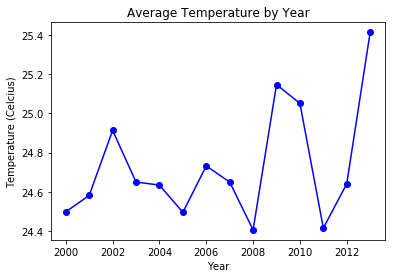

In [242]:

#plt.scatter(ClimateChangeCountryYearlyUSA_df['Year'], ClimateChangeCountryYearlyUSA_df['AverageTemperature'])
plt.xlabel("Year")
plt.ylabel("Temperature (Celcius)")
plt.title("Average Temperature by Year")
#plt.title("Malaria cases Percent of population")
#plt.show()

#ClimateChangeCountryYearlyUSA_df.plot(kind='line',x=ClimateChangeCountryYearlyUSA_df['Year'], y=ClimateChangeCountryYearlyUSA_df['AverageTemperature'], title='USA Temp by Year')

plt.plot(Country_df['Year'], Country_df['AverageTemperature'], marker ='o', color='blue')
#plt.plot(India_df['Year'], India_df['MalariaPercent'], '-.', linewidth=2)
plt.savefig('IndiaTemperature.png')
plt.show()

#how to add legend to show which color represents which country?

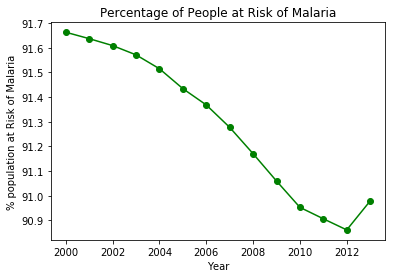

In [243]:
#plt.scatter(ClimateChangeCountryYearlyUSA_df['Year'], ClimateChangeCountryYearlyUSA_df['AverageTemperature'])
plt.xlabel("Year")
plt.ylabel("% population at Risk of Malaria")
plt.title("Percentage of People at Risk of Malaria")
#plt.plot(Country_df['Year'], Country_df['MalariaPercent'], '-.', linewidth=2)
plt.plot(Country_df['Year'], Country_df['MalariaPercent'],marker ='o', color='green')
plt.savefig('IndiaMalariaCasePercent.png')
plt.show()
#how to add legend to show which color represents which country?